## Exercise 1

When throwing two fair dice the probabilites of possible values are


<table style="border-collapse: collapse; width: 35.8719%;" border="1">
<tbody>
<tr>
<td style="width: 15.0794%;">2 or 12</td>
<td style="width: 20.7936%;">1/36 = 2.8%</td>
</tr>
<tr>
<td style="width: 15.0794%;">3 or 11</td>
<td style="width: 20.7936%;">2/36 = 5.6%</td>
</tr>
<tr>
<td style="width: 15.0794%;">4 or 10</td>
<td style="width: 20.7936%;">3/36 = 8.3%</td>
</tr>
<tr>
<td style="width: 15.0794%;">5 or 9</td>
<td style="width: 20.7936%;">4/36 = 11.1%</td>
</tr>
<tr>
<td style="width: 15.0794%;">6 or 8</td>
<td style="width: 20.7936%;">5/36 = 13.9%</td>
</tr>
<tr>
<td style="width: 15.0794%;">7</td>
<td style="width: 20.7936%;">6/36 = 16.7%</td>
</tr>
</tbody>
</table>

<br>

The histogram looks like this.
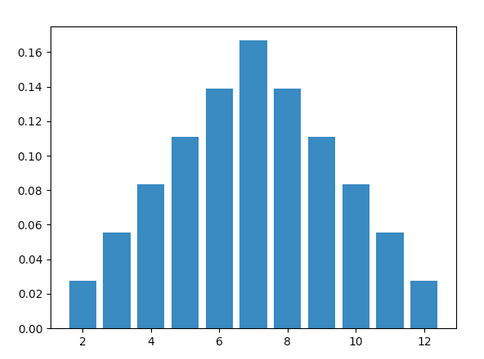
 

1- Write a `for` loop which repeats the steps 1)-3) below for values of `n` ranging as

500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000

2- Use numpy to simulate throwing of two dice n` times. Compute the sum of the dice.

3- Use numpys `histogram()` function to compute the frequencies as

`h,h2 = np.histogram(s,range(2,14))`
where s contains the sum.

4- Use matplotlib's bar function to plot the histogram as

`plt.bar(h2[:-1],h/n)`

and show the value of `n` in the title.

5- What do you observe? You may need to run the loop a few times to see it.

6- How is this related to "regression to the mean"?

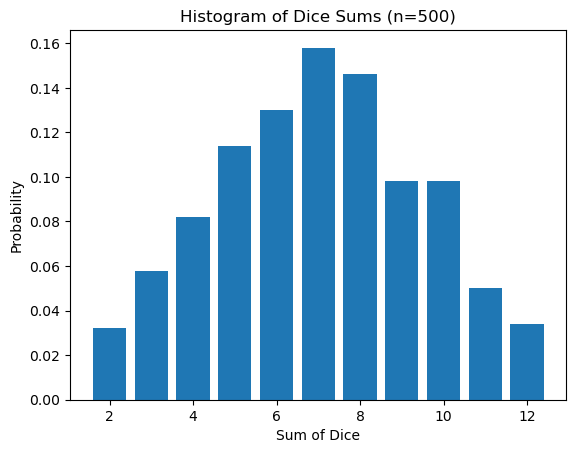

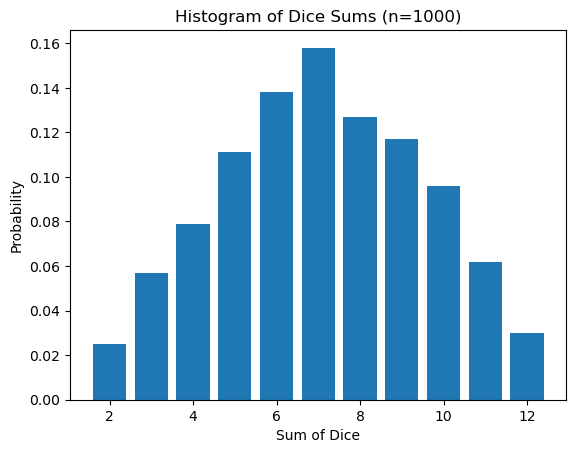

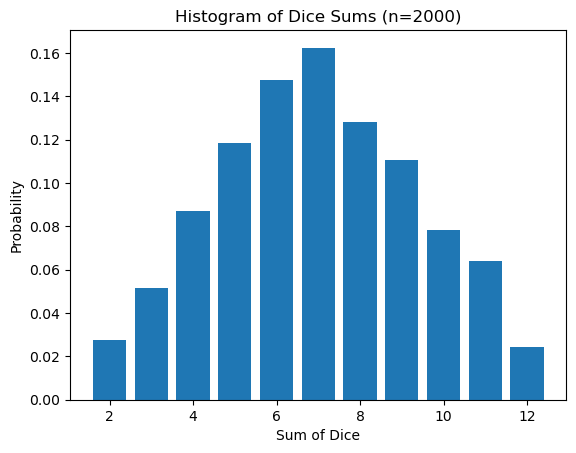

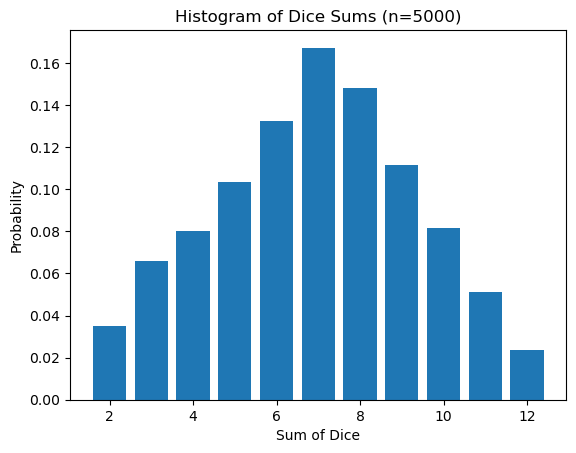

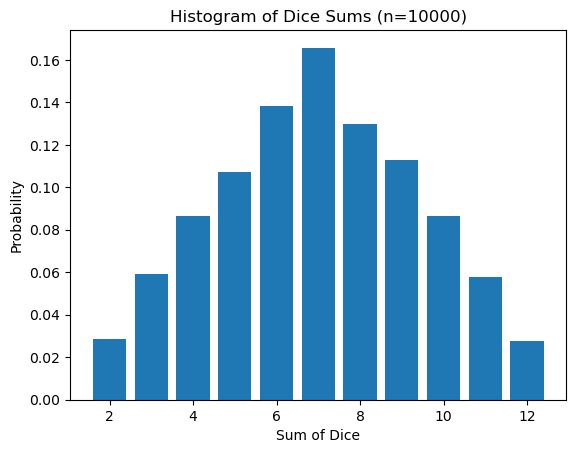

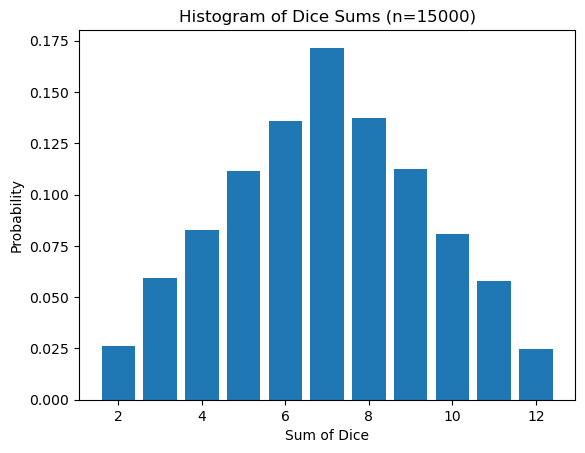

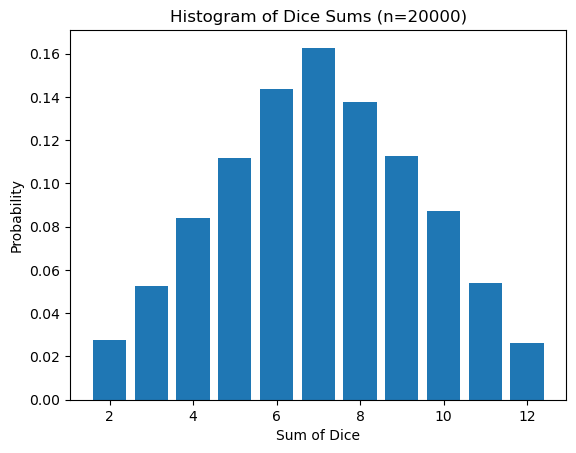

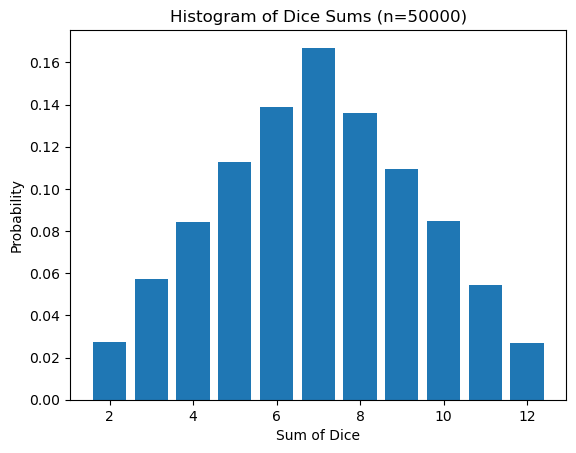

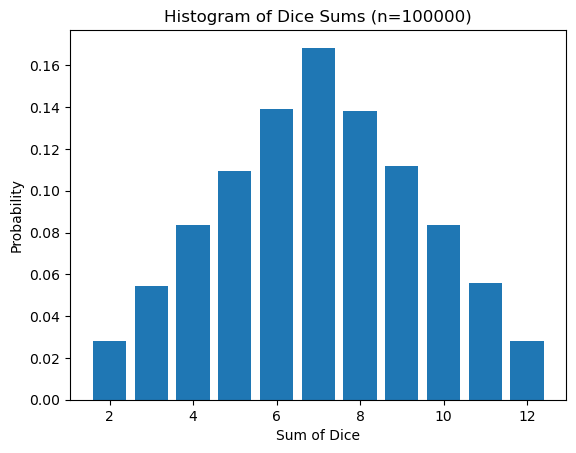

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values of n
n_values = [500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000]

# Set up the expected sum range (2 to 12 for two dice)
bins = np.arange(2, 14)  # The bin edges for the histogram

# Loop through different values of n
for n in n_values:
    # Step 2: Simulate the throwing of two dice n times
    dice_throws = np.random.randint(1, 7, size=(n, 2))  # Two dice, n throws
    sums = dice_throws.sum(axis=1)  # Sum the two dice for each throw
    
    # Step 3: Compute the histogram
    h, h2 = np.histogram(sums, bins=bins)  # Frequencies and bin edges
    
    # Step 4: Plot the histogram
    plt.bar(h2[:-1], h / n)  # Normalize by dividing by n to get relative frequencies
    plt.title(f"Histogram of Dice Sums (n={n})")
    plt.xlabel("Sum of Dice")
    plt.ylabel("Probability")
    plt.show()



In [ ]:
5.What to Observe:
As n increases:

The histogram will become smoother and will approach the theoretical probability distribution of the sums.
With smaller values of n, the histogram will be more variable due to the randomness of the dice rolls.
With larger values of n, the histogram will more closely match the expected probabilities (shown in the original problem).

                                                                                           
6.Relation to "Regression to the Mean":
Regression to the mean refers to the tendency of random variables to move closer to the expected mean over time. In this case, as the number of dice rolls increases (n), the observed distribution of sums will tend to resemble the theoretical distribution more closely, "regressing" toward the true expected probabilities.
For smaller values of n, there is more variability, and extreme outcomes can occur more frequently, but as n increases, the outcomes tend to cluster around the expected values.
This experiment demonstrates how with enough data (large n), randomness becomes predictable and stabilizes around the expected result, showing a form of regression to the mean.

## Exercise 2

Consider the data from the file weight-height.csv.

1- Inspect the dependence between height and weight using a scatter plot. You may use either of the variables as independent variable.

2- Choose appropriate model for the dependence

3- Perform regression on the data using your model of choice

4- Plot the results

5- Compute RMSE and R2 value

6- Assess the quality of the regression (visually and using numbers) in your own words.

You are not required to split the dataset into training and testing sets. Of course you are completely free to experiment it here already.

It is recommended that you use the module sklearn for all your computations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Load the data from the CSV file
# Assuming the CSV file is available in the working directory
df = pd.read_csv('weight-height.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Step 2: Inspect the dependence between height and weight using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Weight'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.grid(True)
plt.show()

# Step 3: Choose a linear regression model based on the scatter plot observation
X = df[['Height']]  # Independent variable (Height)
y = df['Weight']    # Dependent variable (Weight)

# Step 4: Perform regression using sklearn's LinearRegression
model = LinearRegression()
model.fit(X, y)

# Step 5: Plot the regression line along with the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression: Height vs Weight')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Compute RMSE and R2 value
# Predictions from the model
y_pred = model.predict(X)

# Compute RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Compute R2 (Coefficient of Determination)
r2 = model.score(X, y)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Step 7: Assess the quality of the regression
# Visually, if the red line seems to fit the data well, the model is performing well.
# A high R² value (close to 1) indicates a good fit, while a low RMSE indicates low error.

if r2 > 0.8 and rmse < 10:
    print("The regression model seems to fit the data well.")
else:
    print("The regression model does not fit the data well.")
